This notebook demonstrates how to use the connection doctor. I recommend making a copy of this notebook and renaming with the date / location.

A copy of this notebook exists under `/home/xsup/data/dm_functionality_check` on the RTC

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100
plt.rcParams['image.origin'] = 'lower'

import numpy as np
from astropy.io import fits
from magpyx.dm import t2w_offload, connection_doctor, project_zernikes, eye_doctor
from magpyx.dm import dmutils
from magpyx import utils
import purepyindi as indi

def figure(figsize=None):
    'Temporary workaround for traditional figure behaviour with the ipympl widget backend'
    fig = plt.original_figure()
    if figsize:
        w, h =  figsize
    else:
        w, h = plt.rcParams['figure.figsize']
    fig.canvas.layout.height = str(h) + 'in'
    fig.canvas.layout.width = str(w) + 'in'
    return fig

'''try:
    plt.original_figure
except AttributeError:
    plt.original_figure = plt.figure
    plt.figure = figure'''

'try:\n    plt.original_figure\nexcept AttributeError:\n    plt.original_figure = plt.figure\n    plt.figure = figure'

# 2K Connection Doctor

pick a known good reference zrespM and the latest zrespM after remaking the DM connections

In [2]:
zrespM_ref = '/opt/MagAOX/cacao/tweeter/zrespM/zrespM_2021-12-12_21:13:42.fits'
zrespM = '/opt/MagAOX/cacao/tweeter/zrespM/zrespM_2022-02-21_21:30:39.fits'

check the difference in the RMS response. This captures both changes in the actuator functionality as well as illumination

/opt/MagAOX/source/magpyx/magpyx/dm/connection_doctor.py:118: FutureWarning: circle is deprecated in favor of disk.circle will be removed in version 0.19
  circmask = draw.circle(24.5,24.5,25.6,(50,50))


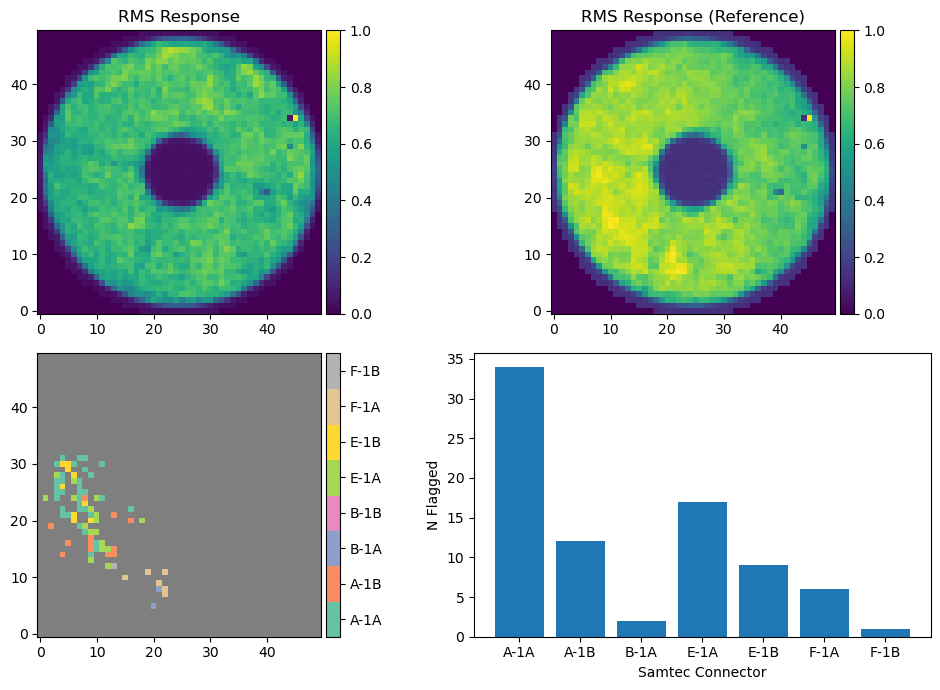

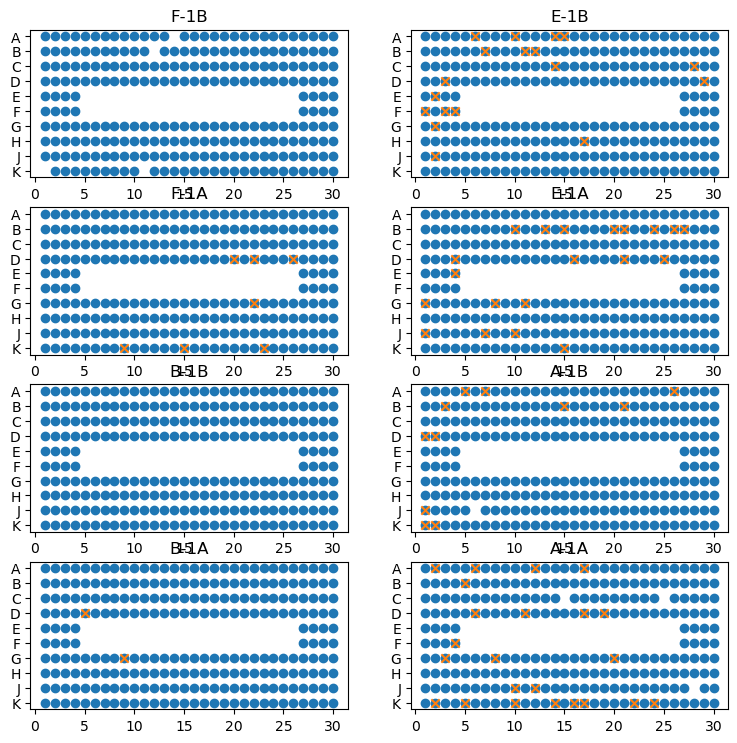

In [3]:
flagged_acts, flagged_connections = connection_doctor.check_actuator_functionality_2K(zrespM, zrespM_ref,
                                                                             display=True,
                                                                             display_samtecs=True,
                                                                             sigma=3.)

plot the latest cacao latency measurement

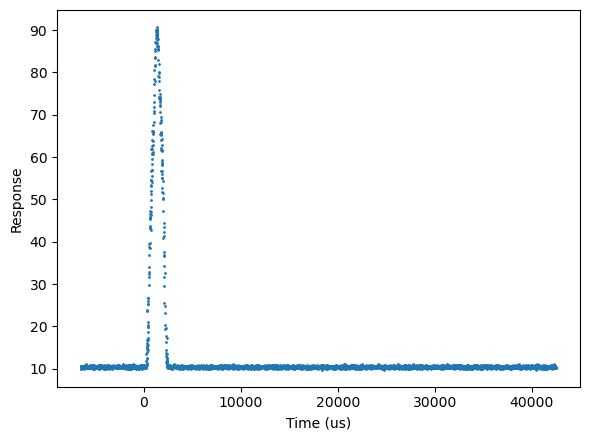

In [8]:
connection_doctor.plot_latency('tweeter')

# Woofer Connection Doctor

same thing, now with the woofer

In [4]:
zrespM = '/opt/MagAOX/cacao/woofer/zrespM/zrespM_2019-11-10_19:24:25.fits'
zrespM_ref = '/opt/MagAOX/cacao/woofer/zrespM/zrespM_2019-09-05_03:51:22.fits'

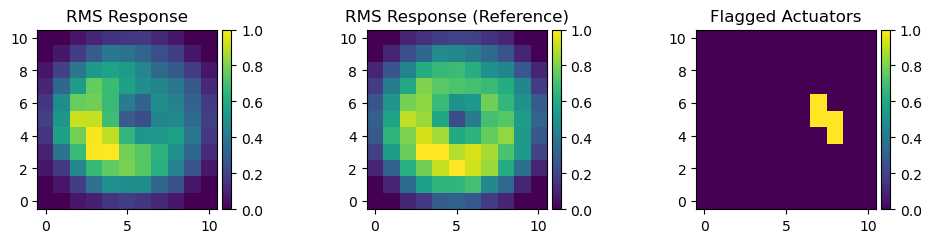

In [6]:
flagged_acts = connection_doctor.check_actuator_functionality_ALPAO(zrespM, zrespM_ref, display=True, sigma=3)

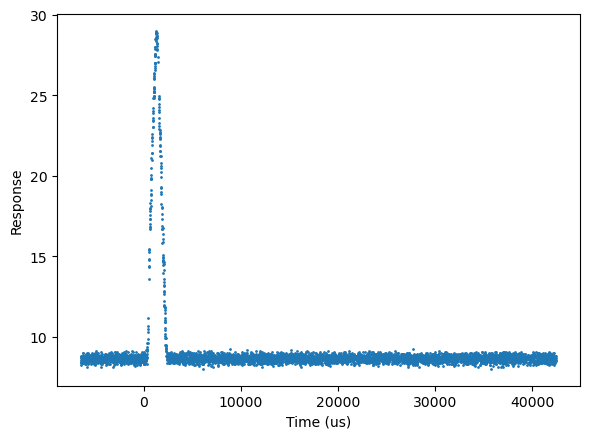

In [7]:
connection_doctor.plot_latency('woofer')